# How to apply Least Square Regression Line in Python

In this notebook, I will be applying Least Square method to fit a regression line between two variables with a linear relationship. We will be using alcohol data showing different amount of calories for different alcohol contents.
Below is a few questions to answer as we analyze the dataset:
    
    A: Is there a linear relationship between 'Alcohol content' and 'Amount of calories in the alcohol'.
    B: can we predict the amount of calories given any alcohol content?

## Loading the dataset and getting it ready for analysis

In [1]:
# these are imports for the standard modules and libraries I will be using 
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# these are imports for the vizualization modules and libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# this is the command for enabling the plots to appear here in the Ipython-notebook 
# it's one of the magic commands
%matplotlib inline

C:\Users\BEN KOLE\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading the dataset to use
alcohol_data = pd.ExcelFile('Alcohol and Calorie Content in Beer.xlsx')

In [3]:
# our data is from an excel file
# let's inspect all the sheets available in the file
alcohol_data.sheet_names

['Sheet1']

In [4]:
# To create a dataframe from the available sheet, we will parse the excel file to a dataframe. 
# Since there is only one sheet,we will not have to specify the sheet name when calling the parse method.
alcohol_df = alcohol_data.parse()

In [5]:
# preview the dataframe
alcohol_df.head()

,Brand,Brewery,Alcohol Content(%),Calories in 12 oz
0,Big Sky Scape Goat Pale Ale,Big Sky Brewing,4.70,163
1,Sierra Nevada Harvest Ale,Sierra Nevada,6.70,215
2,Steel Reserve,MillerCoors,8.10,222
3,Coors Light,MillerCoors,4.15,104
4,Genesee Cream Ale,High Falls Brewing,5.10,162


In [6]:
# get some information about the dataframe
alcohol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               9 non-null      object 
 1   Brewery             9 non-null      object 
 2   Alcohol Content(%)  9 non-null      float64
 3   Calories in 12 oz   9 non-null      int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 416.0+ bytes


Our data does not have any null or missing values. Having that in mind, we can start by having some count plots for the categorical variables(columns) in our dataset.

## Some visualizations on the distributions of the data
It's always good to visualize your data to get an overall view of it.

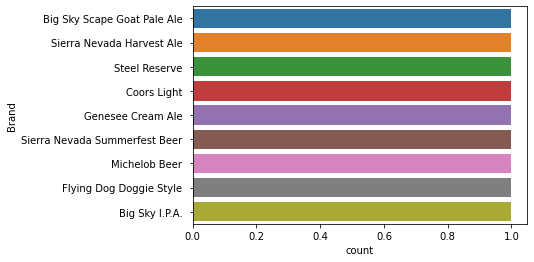

In [7]:
# count plot of Brewery on the y-axis
sns.countplot(y = 'Brand',data = alcohol_df)

Looks like there were unique brands of alcohol.

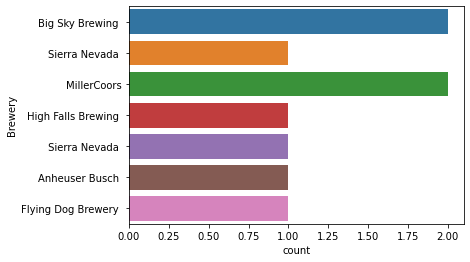

In [8]:
# count plot of Brewery on the y-axis
sns.countplot(y = 'Brewery',data = alcohol_df)

We can vizualize the distributions for the numerical columns too, the 'Alcohol Content' and 'Calories in 12 oz' columns.

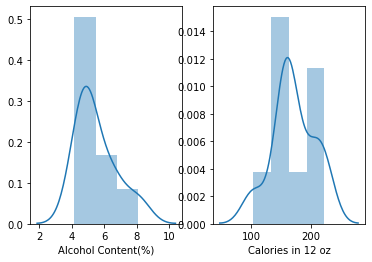

In [9]:
# kde_plots for 'Brand' and 'Brewery' data
fig, (axis1,axis2) = plt.subplots(1,2)

# kde plot and histogram for the 'Alcohol Content' data
sns.distplot(alcohol_df['Alcohol Content(%)'],ax=axis1)

# kdeplot and histogram for the 'Calories in 12 oz' data
sns.distplot(alcohol_df['Calories in 12 oz'],ax=axis2)

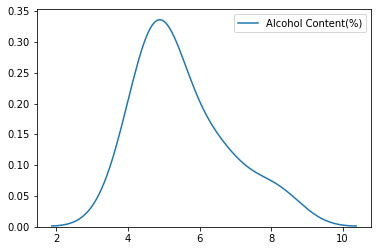

In [10]:
sns.kdeplot(alcohol_df['Alcohol Content(%)'])

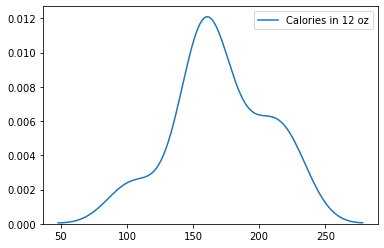

In [11]:
sns.kdeplot(alcohol_df['Calories in 12 oz'])

We notice that both alcohol content and calories follow a normal distribution.

## Covariance, Correlation and Least Square Regression Analysis

Our main part of analysis for this project starts here. We want to look at the linear association between alcohol content and calories. How do calories change with change in alcohol content? The first task in looking at the nature of the relationship is doing a scatter diagram for alcohol content and calories data points.

#### scatter plot

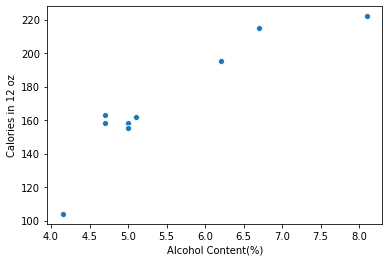

In [12]:
# scatter diagram for 'Alcohol content' and 'Calories' data
sns.scatterplot(x = 'Alcohol Content(%)',y = 'Calories in 12 oz',data=alcohol_df)

From the scatter diagram, it looks the data points are scattered such that they seem to be following a linear pattern.

It would also be good looking at some aspects of covariance and correlation analysis, as they are important aspects of linear relationships.

#### covariance
Covariance investigates the direction of the linear relationship between two variables. 

#### N/B:
##### From Statistics, a positive covariance value implies a positive linear relationship; a negative covariance value implies a negative linear relationship.

In [13]:
# covariance
alcohol_df[['Alcohol Content(%)','Calories in 12 oz']].cov()

,Alcohol Content(%),Calories in 12 oz
Alcohol Content(%),1.556250,40.958333
Calories in 12 oz,40.958333,1291.944444


Great! The table above shows the covariances between the variables. The covariance between calories and alcohol content is 0.409583. Therefore, we can confidently say that there exist a positive linear relationship between alcohol content and calories. The next aspect of linear associations is correlation.

#### correlation
Correlation investigates the direction and strength of the linear relationship between two variables. So, we are going to get the correlation coefficient for the linear relationship between our two variables.

#### N/B:
##### From Statistics, correlation coefficient ranges between -1 and +1. A correlation coefficient close to +1 implies a strong positive linear relationship; a correlation coefficient close to -1 implies a strong negative linear relationship; whereas, a correlation coefficient of 0 implies that there is NO linear relationship.
Having that in mind, let's go ahead and look at the correlations.

In [14]:
# correlation
alcohol_df[['Alcohol Content(%)','Calories in 12 oz']].corr()

,Alcohol Content(%),Calories in 12 oz
Alcohol Content(%),1.000000,0.913441
Calories in 12 oz,0.913441,1.000000


Great! We now have our table for the correlations above. With a correlation coefficient of 0.913441, we can conclude that there is a super strong positive linear relationship between alcohol content and the amount of calories. That means, if alcohol content increases, the amount of calories in the alcohol will also increase significantly.

For a graphical view of the correlations, we can do a heatmap for the correlations.

Text(0.5, 1.0, 'Correlations Heatmap')

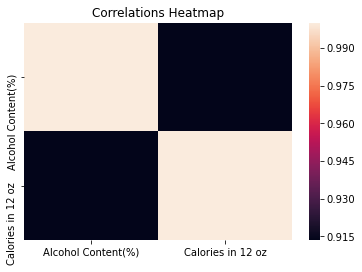

In [15]:
# correlations heatmap
sns.heatmap(alcohol_df[['Alcohol Content(%)','Calories in 12 oz']].corr())

# add a title for the heatmap
plt.title('Correlations Heatmap')

Nice.

Having looked at the covariance and correlations, we can now fit a least square regression line for our variables.

#### Least Square Regression
With seaborn, it's very easy to fit a regression fit line between two variables by just typing one line of code as seen below. A few things to remember about least square regression line is that the regression line must pass through the centroid.

#### N/B:
##### If you take the mean for X and plot it against the mean for Y, the point where they meet is the centroid.
This pushes us into calculating the mean for our X(Alcohol content) and Y(Calories in 12 oz) variables (columns).

In [16]:
# alcohol content
alc_mean = alcohol_df['Alcohol Content(%)'].mean()

# calories mean
cal_mean = alcohol_df['Calories in 12 oz'].mean()

# print out the means in a python statement
print('The mean for alcohol content is %.2f while the mean for calories is %.2f'%(alc_mean,cal_mean))

The mean for alcohol content is 5.52 while the mean for calories is 170.22


Therefore, the seaborn plotted regression fit line must pass through these two points.

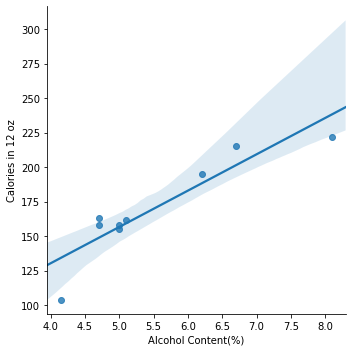

In [17]:
# linear regression model for 'Alcohol content' and 'Calories' data
sns.lmplot(x = 'Alcohol Content(%)',y = 'Calories in 12 oz',data=alcohol_df)

However, we can manually compute least square regression function for our variables. This regression function helps us predict the value of the dependent variable given any value of the independent variable.

In [18]:
# preview the data again
alcohol_df.head()

,Brand,Brewery,Alcohol Content(%),Calories in 12 oz
0,Big Sky Scape Goat Pale Ale,Big Sky Brewing,4.70,163
1,Sierra Nevada Harvest Ale,Sierra Nevada,6.70,215
2,Steel Reserve,MillerCoors,8.10,222
3,Coors Light,MillerCoors,4.15,104
4,Genesee Cream Ale,High Falls Brewing,5.10,162


We can use Least Square Fit method to create a function that defines this linear regression model.

The regression equation is:

$y = a + bx$

$b= \frac{SS_{xy}}{SS_x}$

$a = \bar{y} - b\bar{x}$
    
where:

$b$ = slope 

$a$ = intercept

$SS$ means sum of squares.

$SS_{xy} = \sum(x_i - \bar{x})(y_i - \bar{y})$

$SS_x = \sum(x_i - \bar{x})^2$    

Let's apply the least square regression equation with Python. Our X for this case is the 'Alcohol content' and Y is 'Calories in 12 oz'

In [19]:
# find the slope and intercept of the regression line
SSxy = sum((alcohol_df['Alcohol Content(%)']-alcohol_df['Alcohol Content(%)'].mean())*(alcohol_df['Calories in 12 oz']-(alcohol_df['Calories in 12 oz'].mean())))

SSx = sum((alcohol_df['Alcohol Content(%)']-alcohol_df['Alcohol Content(%)'].mean())**2)

slope = SSxy/SSx
intercept = alcohol_df['Calories in 12 oz'].mean() - slope*alcohol_df['Alcohol Content(%)'].mean()

In [20]:
# print the slope and the intercept as an equation:
print(f'Y = {intercept} + {slope}X')

Y = 25.031236055332414 + 26.3186077643909X


Using the above equation,we can create a new column that gives the calorie estimate for each alcohol content based on the regression function that we just made. 

In [21]:
# create calorie_estimator column for each alcohol_content
alcohol_df['calorie_estimate'] = intercept + slope*alcohol_df['Alcohol Content(%)']

In [22]:
# inspect the dataframe
alcohol_df

,Brand,Brewery,Alcohol Content(%),Calories in 12 oz,calorie_estimate
0,Big Sky Scape Goat Pale Ale,Big Sky Brewing,4.70,163,148.728693
1,Sierra Nevada Harvest Ale,Sierra Nevada,6.70,215,201.365908
2,Steel Reserve,MillerCoors,8.10,222,238.211959
3,Coors Light,MillerCoors,4.15,104,134.253458
4,Genesee Cream Ale,High Falls Brewing,5.10,162,159.256136
5,Sierra Nevada Summerfest Beer,Sierra Nevada,5.00,158,156.624275
6,Michelob Beer,Anheuser Busch,5.00,155,156.624275
7,Flying Dog Doggie Style,Flying Dog Brewery,4.70,158,148.728693
8,Big Sky I.P.A.,Big Sky Brewing,6.20,195,188.206604


Great, we can now predict the amount of calories given any alcohol content. If we plot alcohol content against calories estimates from our regression model and then do a regression line for the data points, it would be a perfect regression line.

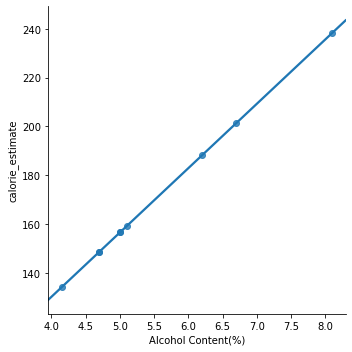

In [23]:
# perfect regression line of alcohol content vs calories estimate from the regression model
sns.lmplot(x = 'Alcohol Content(%)',y = 'calorie_estimate',data=alcohol_df)

### Interpretting the regression line

Okay. We have our regression equation, $Y = 25.031236055332442 + 26.3186077643909X$ . What does it imply? What do the slope and the Y-intercept mean? Before diving into that, let's print out our equation to the nearest two decimal places.

In [24]:
# regression equation to two decimal places
print('Our regression equation is Y = %.2f + %.2fX'%(intercept,slope))

Our regression equation is Y = 25.03 + 26.32X


The slope is 26.32 while the intercept is 25.03. That means, for every 1 unit change in alcohol content(X), calories(Y) change by 26.32 units. The intercept (25.03) is the value of calories(Y) when alcohol content(X) is zero. However, this may not make sense for this case, because we must have alcohol content so that we measure the amount of calories in it. Hence, alcohol content cannot be zero.

That's it!!!

#### Thanks for going through this project!!!